In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
df_image_fitzpatrick_new = pd.read_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv')
df_image_fitzpatrick_new.head()

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,Tan (tan skin w/ neutral undertones),0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,Tan (tan skin w/ neutral undertones),0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,Tan (tan skin w/ neutral undertones),0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,Tan (tan skin w/ neutral undertones),0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,Tan (tan skin w/ neutral undertones),0.866667


# Using only 3000 samples from each product class

In [73]:
df_image_fitzpatrick_new.get("product").unique()

array(['Tan (tan skin w/ neutral undertones)',
       'Dark Neutral (medium dark skin w/ neutral undertones)',
       'Fair Golden (fair skin w/ neutral or golden undertones)',
       'Fair Pink (fair skin w/ neutral or pink undertones)',
       'Medium Neutral (medium skin w/ neutral undertones)',
       'Medium Golden (medium skin w/ golden undertones)'], dtype=object)

In [74]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       38531
Dark Neutral (medium dark skin w/ neutral undertones)        634
Fair Golden (fair skin w/ neutral or golden undertones)      318
Fair Pink (fair skin w/ neutral or pink undertones)          264
Medium Neutral (medium skin w/ neutral undertones)           115
Medium Golden (medium skin w/ golden undertones)              77
Name: count, dtype: int64

In [75]:
df_image_fitzpatrick_new = df_image_fitzpatrick_new.groupby('product').head(3000)

In [76]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       3000
Dark Neutral (medium dark skin w/ neutral undertones)       634
Fair Golden (fair skin w/ neutral or golden undertones)     318
Fair Pink (fair skin w/ neutral or pink undertones)         264
Medium Neutral (medium skin w/ neutral undertones)          115
Medium Golden (medium skin w/ golden undertones)             77
Name: count, dtype: int64

In [77]:
le_fitzpatrick = LabelEncoder()
df_image_fitzpatrick_new['product'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['product'])

In [78]:
product_label = {
    0: "Dark Neutral (medium dark skin w/ neutral undertones)",
    1: "Fair Golden (fair skin w/ neutral or golden undertones)",
    2: "Fair Pink (fair skin w/ neutral or pink undertones",
    3: "Medium Golden (medium skin w/ golden undertones)",
    4: "Medium Neutral (medium skin w/ neutral undertones)",
    5: "Tan (tan skin w/ neutral undertones)"
}

In [79]:
df_image_fitzpatrick_new

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,5,0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,5,0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,5,0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,5,0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,5,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39747,7691.jpg,50-59,Male,Latino_Hispanic,IV,13.260304,85.742805,242.853755,13.257314,202.545121,...,221.0,14,86,255,14,211,255,0.952368,4,0.952941
39761,7754.jpg,30-39,Male,Latino_Hispanic,IV,73.487803,50.690410,237.549506,73.485013,214.267678,...,160.0,1,54,247,1,222,255,0.931567,1,0.945098
39791,7882.jpg,20-29,Male,East Asian,III,14.808494,76.739935,230.560368,14.792490,198.330118,...,188.0,8,25,255,8,241,255,0.904158,0,0.937255
39869,8438.jpg,20-29,Female,Black,VI,14.819097,118.719069,235.075793,14.815868,181.457749,...,230.0,21,98,253,21,201,255,0.921866,1,0.945098


In [80]:
df_image_fitzpatrick_new.describe().T

,count,mean,std,min,25%,50%,75%,max
hsv_mean_h,4408.0,21.261179,30.564361,0.000000,8.503886,10.982611,16.398936,176.743941
hsv_mean_s,4408.0,110.441827,40.401578,0.000000,81.583312,108.426319,136.755924,253.101802
hsv_mean_v,4408.0,176.369966,55.475214,24.176359,133.082923,176.289969,233.309491,253.330895
hsl_mean_h,4408.0,21.532404,30.850350,0.000000,8.531140,11.050373,16.607003,176.737364
hsl_mean_s,4408.0,140.648009,50.290355,18.647461,100.932542,137.394611,185.748097,250.905174
hsl_mean_l,4408.0,132.274265,56.787216,0.000000,86.675278,121.242805,183.813716,252.303013
hsv_median_h,4408.0,17.571915,35.543545,0.000000,7.000000,9.000000,12.000000,178.000000
hsv_median_s,4408.0,109.827473,41.911739,0.000000,80.000000,108.000000,136.250000,255.000000
hsv_median_v,4408.0,180.693172,58.481103,22.000000,135.000000,181.500000,241.000000,255.000000
hsl_median_h,4408.0,17.884755,36.142996,0.000000,7.000000,9.000000,12.000000,178.000000


In [81]:
df_image_fitzpatrick_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4408 entries, 0 to 39875
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   4408 non-null   object 
 1   age                    4408 non-null   object 
 2   gender                 4408 non-null   object 
 3   race                   4408 non-null   object 
 4   phototype              4408 non-null   object 
 5   hsv_mean_h             4408 non-null   float64
 6   hsv_mean_s             4408 non-null   float64
 7   hsv_mean_v             4408 non-null   float64
 8   hsl_mean_h             4408 non-null   float64
 9   hsl_mean_s             4408 non-null   float64
 10  hsl_mean_l             4408 non-null   float64
 11  hsv_median_h           4408 non-null   float64
 12  hsv_median_s           4408 non-null   float64
 13  hsv_median_v           4408 non-null   float64
 14  hsl_median_h           4408 non-null   float64
 15  hsl_medi

In [82]:
df_image_fitzpatrick_new["product"].value_counts()

product
5    3000
0     634
1     318
2     264
4     115
3      77
Name: count, dtype: int64

In [83]:
features_fitzpatrick = [
    "hsv_mean_h",
    "hsv_mean_s",
    "hsv_mean_v",
]
selected_fitzpatrick = df_image_fitzpatrick_new[features_fitzpatrick]

<Axes: >

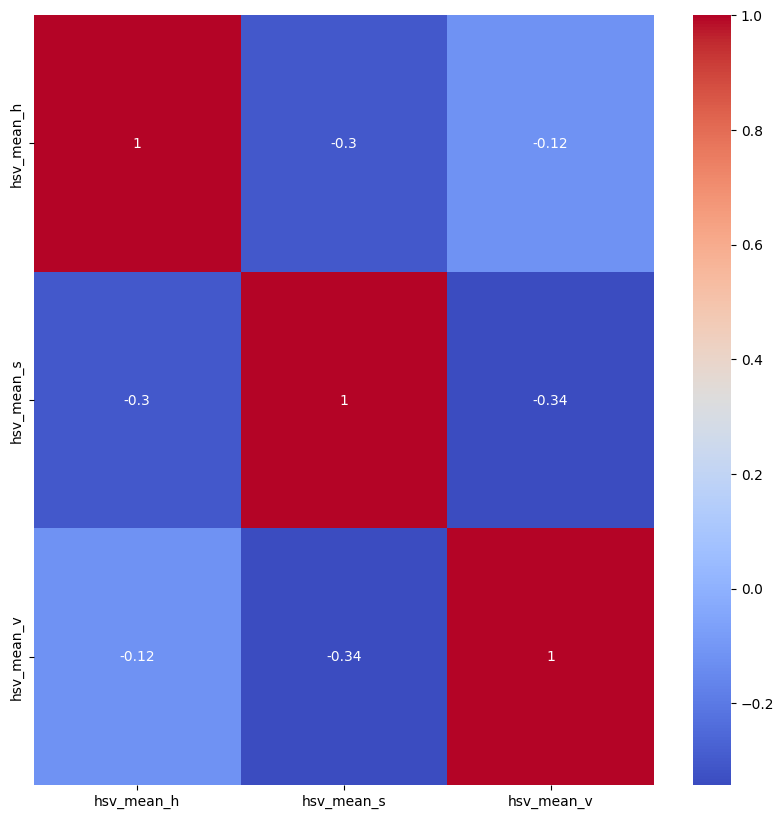

In [84]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_fitzpatrick.corr(), annot=True, cmap="coolwarm")

In [85]:
sc_fitzpatrick = StandardScaler()
sc_fitzpatrick.fit(selected_fitzpatrick)
X_fitzpatrick = pd.DataFrame(sc_fitzpatrick.transform(selected_fitzpatrick), columns=features_fitzpatrick)
X_fitzpatrick

,hsv_mean_h,hsv_mean_s,hsv_mean_v
0,-0.046855,0.680815,-2.102729
1,0.821849,-1.079119,0.116261
2,-0.105962,-0.809834,0.923623
3,4.555495,-0.609292,-1.051505
4,-0.281835,-0.214145,-0.629501
...,...,...,...
4403,-0.261801,-0.611407,1.198577
4404,1.708936,-1.479106,1.102952
4405,-0.211142,-0.834267,0.976951
4406,-0.210795,0.204897,1.058355


In [86]:
y_fitzpatrick_product = df_image_fitzpatrick_new["product"]

In [87]:
X_train_fitzpatrick_product, X_test_fitzpatrick_product, y_train_fitzpatrick_product, y_test_fitzpatrick_product = train_test_split(X_fitzpatrick, y_fitzpatrick_product, test_size=0.3, random_state=42)

In [88]:
train_scores_fitzpatrick_product = np.array([])
test_scores_fitzpatrick_product = np.array([])

for i in range(1, 26):
    knn_product = KNeighborsClassifier(n_neighbors=i)
    knn_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)

    train_scores_fitzpatrick_product = np.append(train_scores_fitzpatrick_product, knn_product.score(X_train_fitzpatrick_product, y_train_fitzpatrick_product))
    test_scores_fitzpatrick_product = np.append(test_scores_fitzpatrick_product, knn_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product))

In [89]:
max_train_score_fitzpatrick_product = np.max(train_scores_fitzpatrick_product)
train_scores_ind_fitzpatrick_product = np.where(train_scores_fitzpatrick_product == max_train_score_fitzpatrick_product)[0][0]
print(f"Max train score on Product Features {max_train_score_fitzpatrick_product*100:.2f}% at k = {train_scores_ind_fitzpatrick_product+1}")

Max train score on Product Features 100.00% at k = 1


In [90]:
print("All train scores on Product Features:")
for i, score in enumerate(train_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Product Features:
K = 1 :: 100.00%
K = 2 :: 91.51%
K = 3 :: 91.73%
K = 4 :: 90.28%
K = 5 :: 89.85%
K = 6 :: 89.53%
K = 7 :: 89.01%
K = 8 :: 88.56%
K = 9 :: 88.65%
K = 10 :: 88.07%
K = 11 :: 87.94%
K = 12 :: 87.68%
K = 13 :: 87.68%
K = 14 :: 87.29%
K = 15 :: 87.42%
K = 16 :: 87.26%
K = 17 :: 87.07%
K = 18 :: 87.00%
K = 19 :: 87.00%
K = 20 :: 87.00%
K = 21 :: 86.71%
K = 22 :: 86.61%
K = 23 :: 86.35%
K = 24 :: 85.93%
K = 25 :: 86.00%


In [91]:
max_test_score_fitzpatrick_product = np.max(test_scores_fitzpatrick_product)
test_scores_ind_fitzpatrick_product = np.where(test_scores_fitzpatrick_product == max_test_score_fitzpatrick_product)[0][0]
print(f"Max test score on Product Features {max_test_score_fitzpatrick_product*100:.2f}% at k = {test_scores_ind_fitzpatrick_product+1}")

Max test score on Product Features 87.98% at k = 6


In [92]:
print("All test scores on Product Features:")
for i, score in enumerate(test_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Product Features:
K = 1 :: 87.07%
K = 2 :: 87.00%
K = 3 :: 86.70%
K = 4 :: 87.76%
K = 5 :: 87.00%
K = 6 :: 87.98%
K = 7 :: 87.23%
K = 8 :: 87.15%
K = 9 :: 87.00%
K = 10 :: 87.07%
K = 11 :: 87.45%
K = 12 :: 87.38%
K = 13 :: 87.30%
K = 14 :: 87.07%
K = 15 :: 86.85%
K = 16 :: 86.85%
K = 17 :: 86.39%
K = 18 :: 86.55%
K = 19 :: 86.85%
K = 20 :: 86.39%
K = 21 :: 86.70%
K = 22 :: 86.47%
K = 23 :: 86.70%
K = 24 :: 86.24%
K = 25 :: 86.17%


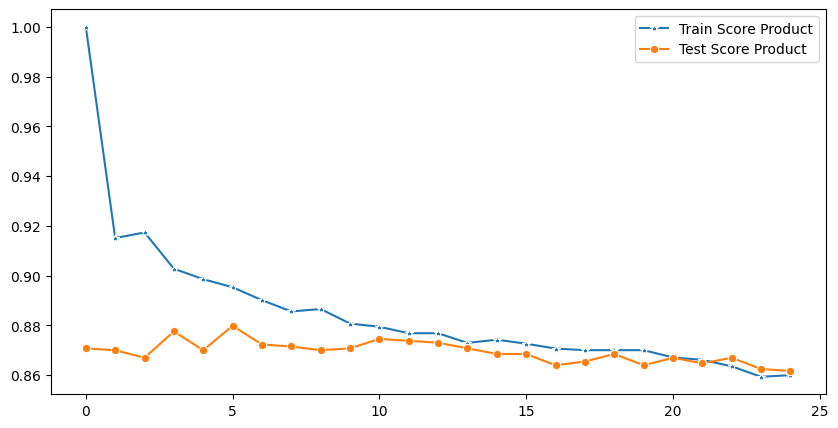

In [24]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_product = sns.lineplot(train_scores_fitzpatrick_product, marker="*", label="Train Score Product")
line_fitzpatrick_product = sns.lineplot(test_scores_fitzpatrick_product, marker="o", label="Test Score Product")

In [93]:
knn_fitzpatrick_product = KNeighborsClassifier(n_neighbors=3)
knn_fitzpatrick_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)
knn_fitzpatrick_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product)

0.8669690098261527

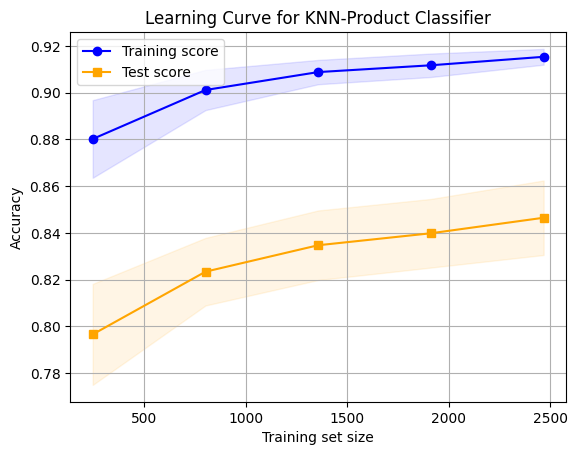

In [26]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_fitzpatrick_product,
    X_train_fitzpatrick_product,
    y_train_fitzpatrick_product,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Product Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
print(classification_report(y_test_fitzpatrick_product, y_pred_fitzpatrick_product))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       179
           1       0.31      0.30      0.30        84
           2       0.69      0.72      0.71        76
           3       0.50      0.12      0.20        24
           4       0.29      0.14      0.19        28
           5       1.00      0.98      0.99       932

    accuracy                           0.87      1323
   macro avg       0.57      0.51      0.52      1323
weighted avg       0.86      0.87      0.86      1323



In [ ]:
knn_cv_fitzpatrick_product = KNeighborsClassifier(n_neighbors=3)
cv_scores_fitzpatrick_product = cross_val_score(knn_cv_fitzpatrick_product, X_fitzpatrick, y_fitzpatrick_product, cv=25)
print("Cross Validation Score on Product")
print(cv_scores_fitzpatrick_product)

Cross Validation Score on Product
[0.8700565  0.81920904 0.85310734 0.83050847 0.85875706 0.84745763
 0.84180791 0.85875706 0.86931818 0.85795455 0.84659091 0.875
 0.88636364 0.89772727 0.85227273 0.88068182 0.86363636 0.85227273
 0.86931818 0.84659091 0.86931818 0.85795455 0.84090909 0.86931818
 0.84090909]


In [ ]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
confusion_matrix(y_test_fitzpatrick_product, y_pred_fitzpatrick_product)
pd.crosstab(y_test_fitzpatrick_product, y_pred_fitzpatrick_product, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,144,33,1,0,0,1,179
1,53,25,2,0,4,0,84
2,2,10,55,3,6,0,76
3,2,0,19,3,0,0,24
4,9,12,3,0,4,0,28
5,15,1,0,0,0,916,932
All,225,81,80,6,14,917,1323


In [ ]:
rskf_fitzpatrick_product = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [ ]:
param_grid_fitzpatrick_product = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_product = KNeighborsClassifier()
knn_gridcv_fitzpatrick_product = GridSearchCV(knn_fitzpatrick_product, param_grid_fitzpatrick_product, cv=rskf_fitzpatrick_product)
knn_gridcv_fitzpatrick_product.fit(X_fitzpatrick, y_fitzpatrick_product)

print(f"Best score Product Features: {knn_gridcv_fitzpatrick_product.best_score_}")
print(f"Best parameters Product Features: {knn_gridcv_fitzpatrick_product.best_params_}")

Best score Product Features: 0.8692842343142327
Best parameters Product Features: {'n_neighbors': 4}


#### Save the Model to Pickle

In [ ]:
pd.to_pickle(knn_fitzpatrick_product, "models/knn-product.pkl")

# Use SMOTE

We use SMOTE to oversample the minority classes to have the same number of samples as the majority class.

In [100]:
smote_product = SMOTE(k_neighbors=3)
X_train_balanced, y_train_balanced = smote_product.fit_resample(X_train_fitzpatrick_product, y_train_fitzpatrick_product)

In [101]:
knn_product_smote = KNeighborsClassifier(n_neighbors=3)
knn_product_smote.fit(X_train_balanced, y_train_balanced)
knn_product_smote.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product)

0.8594104308390023

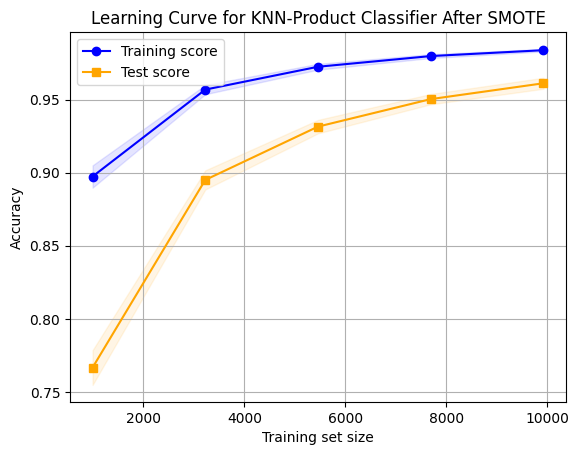

In [102]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_product_smote,
    X_train_balanced,
    y_train_balanced,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Product Classifier After SMOTE")
plt.legend()
plt.grid(True)
plt.show()

In [110]:
y_pred_clf = knn_product_smote.predict(X_test_fitzpatrick_product)
print(classification_report(y_test_fitzpatrick_product, y_pred_clf))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       179
           1       0.32      0.43      0.37        84
           2       0.72      0.58      0.64        76
           3       0.41      0.54      0.46        24
           4       0.37      0.54      0.43        28
           5       1.00      0.98      0.99       932

    accuracy                           0.86      1323
   macro avg       0.59      0.62      0.60      1323
weighted avg       0.88      0.86      0.87      1323



In [109]:
knn_smote_cv = KNeighborsClassifier(n_neighbors=3)
cv_score_smote = cross_val_score(knn_product_smote, X_fitzpatrick, y_fitzpatrick_product, cv=25)
print("Cross Validation Score on Product")
print(cv_score_smote)

Cross Validation Score on Product
[0.8700565  0.81920904 0.85310734 0.83050847 0.85875706 0.84745763
 0.84180791 0.85875706 0.86931818 0.85795455 0.84659091 0.875
 0.88636364 0.89772727 0.85227273 0.88068182 0.86363636 0.85227273
 0.86931818 0.84659091 0.86931818 0.85795455 0.84090909 0.86931818
 0.84090909]


In [111]:
y_pred_cm = knn_product_smote.predict(X_test_fitzpatrick_product)
confusion_matrix(y_test_fitzpatrick_product, y_pred_cm)
pd.crosstab(y_test_fitzpatrick_product, y_pred_cm, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,118,58,2,0,1,0,179
1,31,36,1,0,16,0,84
2,1,4,44,18,9,0,76
3,0,0,11,13,0,0,24
4,1,9,3,0,15,0,28
5,15,5,0,1,0,911,932
All,166,112,61,32,41,911,1323


In [112]:
rskf_fitzpatrick_product_smote = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [114]:
param_grid_fitzpatrick_product_smote = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_product_smote_grid = KNeighborsClassifier()
knn_gridcv_fitzpatrick_product_smote = GridSearchCV(knn_fitzpatrick_product_smote_grid, param_grid_fitzpatrick_product_smote, cv=rskf_fitzpatrick_product_smote)
knn_gridcv_fitzpatrick_product_smote.fit(X_fitzpatrick, y_fitzpatrick_product)

print(f"Best score Product Features: {knn_gridcv_fitzpatrick_product_smote.best_score_}")
print(f"Best parameters Product Features: {knn_gridcv_fitzpatrick_product_smote.best_params_}")

Best score Product Features: 0.8692842343142327
Best parameters Product Features: {'n_neighbors': 4}


In [105]:
unseen_data_product = np.array([110.87840136054422, 101.3015873015873, 211.65433673469389
])
test_unseen_product = knn_product_smote.predict(unseen_data_product.reshape(1, -1))
print(f"Predicted Product: {le_fitzpatrick.inverse_transform(test_unseen_product)[0]}")

Predicted Product: Medium Golden (medium skin w/ golden undertones)


/Users/avv210/Documents/IT/GitHub/fores/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Save the SMOTE Model to Pickle

In [115]:
pd.to_pickle(knn_product_smote, "models/knn-product-smote.pkl")